<h2 style="color:black;">Lab2 </h2>

<hr style="border:2px solid black;">

<h4 style="color:black;">Realised by:</h4>
<ul>
    <li><strong style="color:black;">Aicha Kharbach</strong></li>
</ul>

<h4 style="color:black;">Guided by:</h4> 
<ul>
    <li><strong style="color:black;">Pr . ELAACHAk LOTFI</strong></li>
</ul>
<p><strong>The main purpose behind this lab is to get familiar with NLP Rule based, Regex
and NLP Word embedding.</p>

<h3>Extraction des données de MongoDB</h3>

In [2]:
import pandas as pd
import numpy as np
import re
from pymongo import MongoClient
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from gensim.models import Word2Vec, FastText
import nltk
from nltk.corpus import stopwords

# Connexion à MongoDB
client = MongoClient('mongodb://localhost:27017/')
db = client['Atelier']
collection = db['scraping']

In [3]:
# Extraction des données
data = list(collection.find({}))
df = pd.DataFrame(data)

In [4]:
# Affichage des premières lignes pour vérification
df.head()

,_id,title,properties,ingredients,recipes
0,66134fc115ff5e1dc26863b7,تشيز كيك قليل الدسم,سهلة,180 \n\n\nجرام بسكويت عادي\n\n\n\n\n\n\n 90 \n...,1\n\nيحمى الفرن إلى 160 درجة مئوية (بدون مروحة...
1,66134fc115ff5e1dc26863b8,كيك الموز بالتوفي,سهلة,1 1/2 \n\n\nكوب دقيق\n\n\n\n\n\n\n 1 \n\n\nملع...,1\n\nيثبت الرف الشبكي في وسط الفرن. يسخن الفرن...
2,66134fc115ff5e1dc26863b9,كيك ماربل بالكاكاو,سهلة,3 \n\n\nكوب دقيق\n\n\n\n\n\n\n 3 \n\n\nملعقة ص...,1\n\nيحضر قالب ذو فتحة من الوسط سعة 12 كوب. يد...
3,66134fc115ff5e1dc26863ba,كيك القرع واللوز,سهلة,125 \n\n\nجرام دقيق اللوز\n\n\n\n\n\n\n 25 \n\...,1\n\nيخلط دقيق اللوز والطحين متعدد الاستعمالات...
4,66134fc115ff5e1dc26863bb,كعكة‭ ‬الجواهر,سهلة,0 \n\n\nعبوة تحتوي على 4 أنواع مختلفة من الجيل...,Recipes not available


<h3>Prétraitement des données</h3>

In [5]:
# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# Get Arabic stop words
arabic_stop_words = set(stopwords.words('arabic'))

# Fonction de nettoyage du texte
def preprocess_arabic(text):
    # Remove non-Arabic characters and extra spaces
    cleaned_text = re.sub(r'[^\u0621-\u064A\s]', '', text)
    cleaned_text = re.sub(r'\s+', ' ', cleaned_text)

    # Tokenize the text
    tokens = nltk.word_tokenize(cleaned_text)

    # Remove stop words
    tokens = [word for word in tokens if word not in arabic_stop_words]

    return ' '.join(tokens)

# Applying the preprocessing function
df['cleaned_text'] = df['recipes'].apply(preprocess_arabic)
print("Texte nettoyé :")
print(df['cleaned_text'].head(10))


Texte nettoyé :
0    يحمى الفرن درجة مئوية بدون مروحة تغلف قاعدة قا...
1    يثبت الرف الشبكي وسط الفرن يسخن الفرن درجة حرا...
2    يحضر قالب فتحة الوسط سعة كوب يدهن القالب بقليل...
3    يخلط دقيق اللوز والطحين متعدد الاستعمالات والب...
4                                                     
5    تخفق الزبدة السكر يتكون خليطا خفيفا وزغبا يضاف...
6    لعمل الصوص يرفع السكر الماء النار درجة حرارة م...
7    تنخل المكونات الجافة معا السكر توضع بقية المكو...
8    يسخن الفرن لدرجة حرارة يحضر قالب مستدير مقاس ب...
9    يخفق البيض والسكر والفانيليا يصبح المزيج باهتا...
Name: cleaned_text, dtype: object


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<h3>Application des techniques d'encodage et d'embedding</h3>

<h5>One-Hot Encoding</h5>

In [6]:
# Create a CountVectorizer instance
vectorizer = CountVectorizer(binary=True)

# Fit the vectorizer on the cleaned ingredients text
X = vectorizer.fit_transform(df['cleaned_text'])

# Convert the one-hot encoded ingredients to a DataFrame
one_hot_encoded_ingredients = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Display just the part of the DataFrame with one-hot encoded ingredients
print("One-Hot Encoded Ingredients:")
print(one_hot_encoded_ingredients.head(10))

One-Hot Encoded Ingredients:
   آخر  آيس  أخرى  أرباع  أرباعه  أسنان  أصفر  أضيفي  أكواب  إخراجه  ...  يلف  \
0    0    0     0      0       0      0     0      0      0       0  ...    0   
1    0    0     0      0       0      0     0      1      0       0  ...    0   
2    0    0     0      1       0      0     1      0      0       0  ...    0   
3    0    0     0      0       1      0     0      0      0       0  ...    0   
4    0    0     0      0       0      0     0      0      0       0  ...    0   
5    0    0     0      0       0      0     0      0      0       0  ...    0   
6    0    0     0      0       0      0     0      0      0       0  ...    0   
7    0    0     0      0       0      1     0      0      0       0  ...    0   
8    0    0     0      0       0      0     0      0      0       1  ...    0   
9    0    0     0      0       0      0     0      0      0       0  ...    0   

   يمتزج  يمتزجان  يمتزجوا  ينثر  ينخل  ينعم  ينقل  يوزع  يوضع  
0      0      

 <h5>Bag of Words</h5>

In [7]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['cleaned_text'])
df_bow_sklearn = pd.DataFrame(X.toarray(),

columns=vectorizer.get_feature_names_out())

df_bow_sklearn.head()

,آخر,آيس,أخرى,أرباع,أرباعه,أسنان,أصفر,أضيفي,أكواب,إخراجه,...,يلف,يمتزج,يمتزجان,يمتزجوا,ينثر,ينخل,ينعم,ينقل,يوزع,يوضع
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,5
2,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,2
3,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


 <h5>TF-IDF</h5>

In [8]:
tfidf = TfidfVectorizer()
result = tfidf.fit_transform(df['cleaned_text'])

# get idf values
print('\nidf values:')
for ele1, ele2 in zip(tfidf.get_feature_names_out(), tfidf.idf_):
    print(ele1, ':', ele2)


idf values:
آخر : 3.164963715117998
آيس : 4.012261575505201
أخرى : 4.012261575505201
أرباع : 4.012261575505201
أرباعه : 4.012261575505201
أسنان : 3.501435951739211
أصفر : 4.012261575505201
أضيفي : 4.012261575505201
أكواب : 4.012261575505201
إخراجه : 4.012261575505201
إدخاله : 3.501435951739211
إزلته : 4.012261575505201
إضافة : 2.5459245067117746
إضافية : 4.012261575505201
إعداد : 4.012261575505201
إليه : 2.7129785913749407
إليها : 3.501435951739211
اسطوانى : 4.012261575505201
اظهار : 4.012261575505201
الآخر : 4.012261575505201
الآيس : 2.913649286837092
الأبيض : 3.164963715117998
الأخرى : 2.7129785913749407
الأخضر : 4.012261575505201
الأسنان : 4.012261575505201
الأطراف : 4.012261575505201
الألوان : 4.012261575505201
الأناناس : 4.012261575505201
الأوريو : 4.012261575505201
الإصبع : 4.012261575505201
الاستعمالات : 4.012261575505201
الباب : 4.012261575505201
الباردة : 3.501435951739211
الباكينج : 4.012261575505201
البذور : 4.012261575505201
البراد : 3.164963715117998
البرتقال : 3.50143595

In [9]:
# get indexing
print('\nWord indexes:')
print(tfidf.vocabulary_)


Word indexes:
{'يحمى': 749, 'الفرن': 142, 'درجة': 399, 'مئوية': 545, 'بدون': 273, 'مروحة': 566, 'تغلف': 343, 'قاعدة': 472, 'قالب': 473, 'كيك': 508, 'قياس': 487, 'سنتمتر': 424, 'قابلة': 471, 'للإزالة': 525, 'بورق': 307, 'الخبز': 78, 'لتحضير': 514, 'القاعدة': 148, 'يسحق': 769, 'البسكويت': 38, 'محضرة': 557, 'الطعام': 128, 'تضاف': 339, 'الزبدة': 100, 'الذائبة': 90, 'ويضربان': 724, 'يمتزجان': 797, 'يوضع': 804, 'الخليط': 85, 'القالب': 149, 'ويضغط': 725, 'جيدا': 378, 'باستخدام': 235, 'اليد': 227, 'يخبز': 750, 'لمدة': 531, 'دقائق': 400, 'يخرج': 756, 'ويبرد': 701, 'الحشوة': 70, 'تخلط': 324, 'المقادير': 203, 'المتبقية': 180, 'يتشكل': 737, 'مزيجا': 567, 'ناعما': 598, 'يسكب': 771, 'الباردة': 32, 'ويخبز': 708, 'دقيقة': 402, 'إضافية': 13, 'يكون': 794, 'الكيك': 171, 'طريا': 445, 'الشيء': 120, 'لكنه': 523, 'سيجمد': 425, 'عندما': 456, 'يبرد': 734, 'فرن': 464, 'مطفأ': 577, 'فتح': 462, 'الباب': 31, 'قليلا': 484, 'وذلك': 678, 'لمنع': 532, 'السطح': 106, 'التشقق': 46, 'يقدم': 788, 'الفاكهة': 138, 'الموسمية

In [10]:
# display tf-idf values
print('\ntf-idf value:')
print(result)


tf-idf value:
  (0, 212)	0.12039352629937441
  (0, 138)	0.12039352629937441
  (0, 788)	0.08140672118298067
  (0, 46)	0.12039352629937441
  (0, 106)	0.10506548823108837
  (0, 532)	0.12039352629937441
  (0, 678)	0.12039352629937441
  (0, 484)	0.07639402947362212
  (0, 31)	0.12039352629937441
  (0, 462)	0.12039352629937441
  (0, 577)	0.12039352629937441
  (0, 464)	0.06500691203591714
  (0, 734)	0.1442001765980498
  (0, 456)	0.10506548823108837
  (0, 425)	0.12039352629937441
  (0, 523)	0.12039352629937441
  (0, 120)	0.12039352629937441
  (0, 445)	0.12039352629937441
  (0, 171)	0.12400753546220128
  (0, 794)	0.12039352629937441
  (0, 13)	0.12039352629937441
  (0, 402)	0.03204151210385367
  (0, 708)	0.10506548823108837
  (0, 32)	0.10506548823108837
  (0, 771)	0.09496916766316411
  :	:
  (59, 439)	0.0798782559387383
  (59, 127)	0.11939591231296182
  (59, 363)	0.13928739850926078
  (59, 206)	0.10574625405877311
  (59, 639)	0.154095259429023
  (59, 65)	0.154095259429023
  (59, 673)	0.139287398

In [11]:
# in matrix form
print('\ntf-idf values in matrix form:')
print(result.toarray())


tf-idf values in matrix form:
[[0.         0.         0.         ... 0.         0.         0.05927403]
 [0.         0.         0.         ... 0.         0.05346869 0.19465866]
 [0.         0.         0.         ... 0.         0.04741419 0.06904663]
 ...
 [0.         0.         0.         ... 0.10271402 0.         0.05794742]
 [0.         0.         0.         ... 0.         0.         0.13965334]
 [0.         0.         0.         ... 0.         0.         0.        ]]


  <h5>Word2Vec - Skip Gram</h5>

In [12]:
id_to_word = {i:x for (i, x) in enumerate(df['cleaned_text'])}
word_to_id = {x:i for (i, x) in enumerate(df['cleaned_text'])}
print(word_to_id)
print(id_to_word)

{'يحمى الفرن درجة مئوية بدون مروحة تغلف قاعدة قالب كيك قياس سنتمتر قاعدة قابلة للإزالة بورق الخبز لتحضير القاعدة يسحق البسكويت محضرة الطعام تضاف الزبدة الذائبة ويضربان يمتزجان يوضع الخليط القالب ويضغط جيدا القاعدة باستخدام اليد يخبز الفرن لمدة دقائق يخرج الفرن ويبرد لتحضير الحشوة تخلط المقادير المتبقية محضرة الطعام يتشكل مزيجا ناعما يسكب القاعدة الباردة ويخبز لمدة دقيقة إضافية يكون الكيك طريا الشيء لكنه سيجمد عندما يبرد يبرد الكيك فرن مطفأ فتح الباب قليلا وذلك لمنع السطح التشقق يقدم الفاكهة الموسمية': 30, 'يثبت الرف الشبكي وسط الفرن يسخن الفرن درجة حرارة يحضر طبق فرن مقاس بوصة ويدهن بطبقة خفيفة الزبدة السمن قطعة ورق الزبدة طبق عميق ينخل الدقيق البيكنج باودر والملح وعاء الخلاط يوضع السكر البيض والفانيليا يثبت المضرب الشبكي ويشغل الخلاط سرعة متوسطة يتضاعف حجم البيض أضيفي الزيت الحليب وخليط الدقيق يشغل سرعة متوسطة لمدة دقيقة يسكب خليط الكيك طبق الفرن يوضع الطبق الفرن لمدة دقيقة يختبر نضج الكيك بعود خشبي صغير يجب يخرج العود نظيفا غرزه وسط الكيك كدليل نضج الكيك يخرج الكيك الفرن ويسكب الحليب

In [13]:
def generate_training_data(cleaned_text, word_to_id, window_size):
    X, Y = [], []
    for i in range(len(cleaned_text)):
        nbr_inds = list(range(max(0, i - window_size), i)) + list(range(i + 1, min(len(df['cleaned_text']), i + window_size + 1)))
        for j in nbr_inds:
            X.append(word_to_id[cleaned_text[i]])
            Y.append(word_to_id[cleaned_text[j]])
    return np.array(X), np.array(Y)

x, y = generate_training_data(df['cleaned_text'], word_to_id, 3)
print(x)
print(y)
def expand_dims(x, y):
    x = np.expand_dims(x, axis=0)
    y = np.expand_dims(y, axis=0)
    return x, y
x, y = expand_dims(x, y)
print(x)
print(y)

[30 30 30 31 31 31 31 32 32 32 32 32 33 33 33 33 33 33 34 34 34 34 34 34
 35 35 35 35 35 35 36 36 36 36 36 36 37 37 37 37 37 37 38 38 38 38 38 38
 39 39 39 39 39 39 40 40 40 40 40 40 41 41 41 41 41 41 42 42 42 42 42 42
 43 43 43 43 43 43 44 44 44 44 44 44 45 45 45 45 45 45 46 46 46 46 46 46
 47 47 47 47 47 47 48 48 48 48 48 48 49 49 49 49 49 49 50 50 50 50 50 50
 51 51 51 51 51 51 52 52 52 52 52 52 53 53 53 53 53 53 54 54 54 54 54 54
 55 55 55 55 55 55 56 56 56 56 56 56 57 57 57 57 57 57 58 58 58 58 58 58
 59 59 59 59 59 59 30 30 30 30 30 30 31 31 31 31 31 31 32 32 32 32 32 32
 33 33 33 33 33 33 34 34 34 34 34 34 35 35 35 35 35 35 36 36 36 36 36 36
 37 37 37 37 37 37 38 38 38 38 38 38 39 39 39 39 39 39 40 40 40 40 40 40
 41 41 41 41 41 41 42 42 42 42 42 42 43 43 43 43 43 43 44 44 44 44 44 44
 45 45 45 45 45 45 46 46 46 46 46 46 47 47 47 47 47 47 48 48 48 48 48 48
 49 49 49 49 49 49 50 50 50 50 50 50 51 51 51 51 51 51 52 52 52 52 52 52
 53 53 53 53 53 53 54 54 54 54 54 54 55 55 55 55 55

In [14]:
# forward propagation
def init_parameters(vocab_size, emb_size):
    wrd_emb = np.random.randn(vocab_size, emb_size) * 0.01
    w = np.random.randn(vocab_size, emb_size) * 0.01
    return wrd_emb, w

def softmax(z):
    return np.divide(np.exp(z), np.sum(np.exp(z), axis=0, keepdims=True) + 0.001)

def forward(inds, params):
    wrd_emb, w = params
    word_vec = wrd_emb[inds.flatten(), :].T
    z = np.dot(w, word_vec)
    out = softmax(z)
    cache = inds, word_vec, w, z
    return out, cache

# cost funtion
def cross_entropy(y, y_hat):
    m = y.shape[1]
    cost = -(1 / m) * np.sum(np.sum(y_hat * np.log(y + 0.001), axis=0, keepdims=True), axis=1)
    return cost

# dervation of softmax
def dsoftmax(y, out):
    dl_dz = out - y
    return dl_dz

def backward(y, out, cache):
    inds, word_vec, w, z = cache
    wrd_emb, w = params
    dl_dz = dsoftmax(y, out)
    # deviding by the word_vec length to find the average
    dl_dw = (1/word_vec.shape[1]) * np.dot(dl_dz, word_vec.T)
    dl_dword_vec = np.dot(w.T, dl_dz)
    return dl_dz, dl_dw, dl_dword_vec

def update(params, cache, grads, lr=0.03):
    inds, word_vec, w, z = cache
    wrd_emb, w = params
    dl_dz, dl_dw, dl_dword_vec = grads
    wrd_emb[inds.flatten(), :] -= dl_dword_vec.T * lr
    w -= dl_dw * lr
    return wrd_emb, w

In [15]:
# training
vocab_size = len(id_to_word)
m = y.shape[1]
y_one_hot = np.zeros((vocab_size, m))
y_one_hot[y.flatten(), np.arange(m)] = 1

y = y_one_hot

batch_size=256
embed_size = 50

params = init_parameters(vocab_size, 50)

costs = []

for epoch in range(5000):
    epoch_cost = 0
    batch_inds = list(range(0, x.shape[1], batch_size))
    np.random.shuffle(batch_inds)
    for i in batch_inds:
        x_batch = x[:, i:i+batch_size]
        y_batch = y[:, i:i+batch_size]
        pred, cache = forward(x_batch, params)
        grads = backward(y_batch, pred, cache)
        params = update(params, cache, grads, 0.03)
        cost = cross_entropy(pred, y_batch)
        epoch_cost += np.squeeze(cost)
    costs.append(epoch_cost)
    
    if(epoch % 250 == 0):
        print("Cost after epoch {}: {}".format(epoch, epoch_cost))
ix = np.arange(0,5000)

Cost after epoch 0: 8.072240134031244
Cost after epoch 250: 7.849893034210765
Cost after epoch 500: 5.315017894031948
Cost after epoch 750: 4.325658903580006
Cost after epoch 1000: 4.082596097518432
Cost after epoch 1250: 4.008227943224739
Cost after epoch 1500: 3.958474576690685
Cost after epoch 1750: 3.9408839233597686
Cost after epoch 2000: 3.918104138604658
Cost after epoch 2250: 3.8720157644434785
Cost after epoch 2500: 3.845728061402774
Cost after epoch 2750: 3.845916288919962
Cost after epoch 3000: 3.838648565516257
Cost after epoch 3250: 3.8085266771199877
Cost after epoch 3500: 3.8007671130185487
Cost after epoch 3750: 3.795901833215762
Cost after epoch 4000: 3.781687926874236
Cost after epoch 4250: 3.7858564839233226
Cost after epoch 4500: 3.787147409256048
Cost after epoch 4750: 3.779036869499186


Text(0, 0.5, 'Losses')

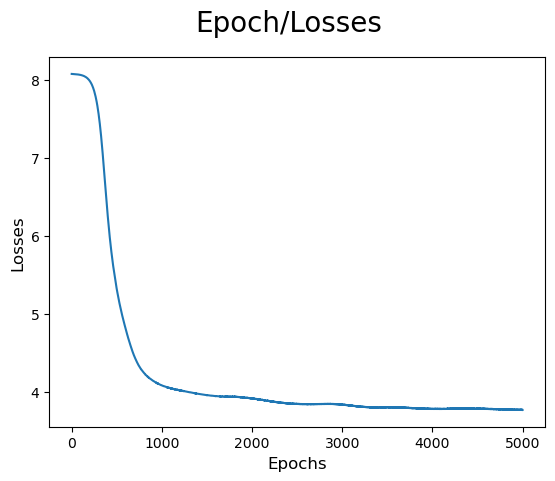

In [16]:
fig = plt.figure()
fig.suptitle('Epoch/Losses', fontsize=20)
plt.plot(ix,[costs[i] for i in ix])
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Losses', fontsize=12)

In [17]:
# test
x_test = np.arange(vocab_size)
x_test = np.expand_dims(x_test, axis=0)
softmax_test, _ = forward(x_test, params)
top_sorted_inds = np.argsort(softmax_test, axis=0)[-4:,:]

for input_ind in range(vocab_size):
    input_word = id_to_word[input_ind]
    output_words = [id_to_word[output_ind] for output_ind in top_sorted_inds[::-1,
    input_ind]]
    print("{}'s skip-grams: {}".format(input_word, output_words))

يحمى الفرن درجة مئوية بدون مروحة تغلف قاعدة قالب كيك قياس سنتمتر قاعدة قابلة للإزالة بورق الخبز لتحضير القاعدة يسحق البسكويت محضرة الطعام تضاف الزبدة الذائبة ويضربان يمتزجان يوضع الخليط القالب ويضغط جيدا القاعدة باستخدام اليد يخبز الفرن لمدة دقائق يخرج الفرن ويبرد لتحضير الحشوة تخلط المقادير المتبقية محضرة الطعام يتشكل مزيجا ناعما يسكب القاعدة الباردة ويخبز لمدة دقيقة إضافية يكون الكيك طريا الشيء لكنه سيجمد عندما يبرد يبرد الكيك فرن مطفأ فتح الباب قليلا وذلك لمنع السطح التشقق يقدم الفاكهة الموسمية's skip-grams: ['يسخن الفرن درجة حرارة درجة مئوية وعاء كبير يخفق بياض البيض الحصول قوام هش وعاء آخر يخلط السكر النشاء جيدا يضاف الخليط تدريجيا بياض البيض المخفوق يمتزجوا تماما يرفع الخليط يخبز لمدة ساعة يغلق الفرن يترك الكيك بداخل الفرن لمدة ساعة ساعتين يبرد تماما تخلط الكريمة السكر الحصول كريمة مخفوقة ترفع طبقة الكيك المخبوز تقدم شرائح البرقوق', 'يضرب وعاء معجون الفستق الحلبي والجلوكوز لمدة دقيقة يضاف بياض البيض الآخر المزج يمتزج البيض بالكامل يضاف السكر البودرة ودقيق اللوز ويخلط المزيج سرعة 

  <h5>Word2Vec - CBOW </h5>

In [18]:
text = " ".join(df['cleaned_text'])
words = text.split()
vocab = set(words)
vocab_size = len(vocab)
embed_dim = 10
context_size = 2

word_to_ix = {word: i for i, word in enumerate(vocab)}
ix_to_word = {i: word for i, word in enumerate(vocab)}

In [19]:
data = []
for i in range(2, len(words) - 2):
    context = [words[i - 2], words[i - 1], words[i + 1], words[i + 2]]
    target = words[i]
    data.append((context, target))
print(data[:10])

[(['يحمى', 'الفرن', 'مئوية', 'بدون'], 'درجة'), (['الفرن', 'درجة', 'بدون', 'مروحة'], 'مئوية'), (['درجة', 'مئوية', 'مروحة', 'تغلف'], 'بدون'), (['مئوية', 'بدون', 'تغلف', 'قاعدة'], 'مروحة'), (['بدون', 'مروحة', 'قاعدة', 'قالب'], 'تغلف'), (['مروحة', 'تغلف', 'قالب', 'كيك'], 'قاعدة'), (['تغلف', 'قاعدة', 'كيك', 'قياس'], 'قالب'), (['قاعدة', 'قالب', 'قياس', 'سنتمتر'], 'كيك'), (['قالب', 'كيك', 'سنتمتر', 'قاعدة'], 'قياس'), (['كيك', 'قياس', 'قاعدة', 'قابلة'], 'سنتمتر')]


In [20]:
# embedings
embeddings = np.random.random_sample((vocab_size, embed_dim))

In [21]:
# linear model
def linear(m, theta):
    w = theta
    return m.dot(w)

# log softmax
def log_softmax(x):
    e_x = np.exp(x - np.max(x))
    return np.log(e_x / e_x.sum())

def NLLLoss(logs, targets):
    out = logs[range(len(targets)), targets]
    return -out.sum()/len(out)

def log_softmax_crossentropy_with_logits(logits,target):
    out = np.zeros_like(logits)
    out[np.arange(len(logits)),target] = 1
    softmax = np.exp(logits) / np.exp(logits).sum(axis=-1,keepdims=True)
    return (- out + softmax) / logits.shape[0]

def forward(context_idxs, theta):
    m = embeddings[context_idxs].reshape(1, -1)
    n = linear(m, theta)
    o = log_softmax(n)
    return m, n, o

def backward(preds, theta, target_idxs):
    m, n, o = preds
    dlog = log_softmax_crossentropy_with_logits(n, target_idxs)
    dw = m.T.dot(dlog)
    return dw

def optimize(theta, grad, lr=0.03):
    theta -= grad * lr
    return theta

In [22]:
# init thetas
theta = np.random.uniform(-1, 1, (2 * context_size * embed_dim, vocab_size))

epoch_losses = {}

for epoch in range(80):
    losses = []
    for context, target in data:
        context_idxs = np.array([word_to_ix[w] for w in context])
        preds = forward(context_idxs, theta)
        target_idxs = np.array([word_to_ix[target]])
        loss = NLLLoss(preds[-1], target_idxs)
        losses.append(loss)
        grad = backward(preds, theta, target_idxs)
        theta = optimize(theta, grad, lr=0.03)
    
    epoch_losses[epoch] = losses
    
ix = np.arange(0,80)

Text(0, 0.5, 'Losses')

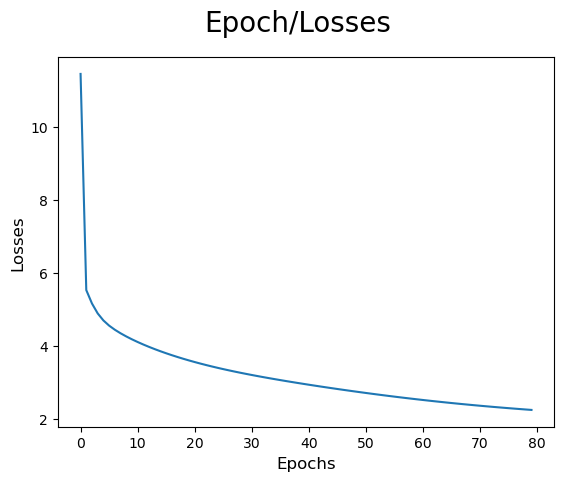

In [23]:
fig = plt.figure()
fig.suptitle('Epoch/Losses', fontsize=20)
plt.plot(ix,[epoch_losses[i][0] for i in ix])
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Losses', fontsize=12)

In [24]:
def predict(words):
    context_idxs = np.array([word_to_ix[w] for w in words])
    preds = forward(context_idxs, theta)
    word = ix_to_word[np.argmax(preds[-1])]
    return word , np.argmax(preds[-1])

predict(['يحمى', 'الفرن', 'مئوية', 'بدون'])

('درجة', 295)

<h5>Glove</h5>

In [25]:
import gensim.downloader as api
from gensim.models import KeyedVectors

In [26]:
# Download and load the GloVe model
glove_model = api.load("glove-wiki-gigaword-100")

In [27]:
# Define a function to compute GloVe embeddings for text
def compute_glove_embedding(text):
    # Tokenize the text
    tokens = text.split()
    
    # Initialize an empty list to store word embeddings
    embeddings = []
    
    # Compute the GloVe embedding for each word in the text
    for token in tokens:
        if token in glove_model:
            embeddings.append(glove_model[token])
    
    # Calculate the average embedding for the entire text
    if embeddings:
        return np.mean(embeddings, axis=0)
    else:
        return np.zeros(glove_model.vector_size)  # Return zeros if no embeddings were found

In [28]:
# Apply the function to your DataFrame's 'new_text' column
df['glove_embedding'] = df['cleaned_text'].apply(compute_glove_embedding)

In [29]:
# Display the DataFrame with GloVe embeddings
print(df['cleaned_text'].head())

0    يحمى الفرن درجة مئوية بدون مروحة تغلف قاعدة قا...
1    يثبت الرف الشبكي وسط الفرن يسخن الفرن درجة حرا...
2    يحضر قالب فتحة الوسط سعة كوب يدهن القالب بقليل...
3    يخلط دقيق اللوز والطحين متعدد الاستعمالات والب...
4                                                     
Name: cleaned_text, dtype: object


<h5>FastText</h5>

In [30]:
import gensim.downloader as api

# Load the pre-trained FastText model
fasttext_model = api.load("fasttext-wiki-news-subwords-300")

In [31]:
def compute_similarity(text):
    # Tokenize the text
    tokens = text.split()
    # Compute the similarity between adjacent word pairs
    similarities = []
    for i in range(len(tokens) - 1):
        word1 = tokens[i]
        word2 = tokens[i + 1]
        # Check if both words exist in the model's vocabulary
        if word1 in fasttext_model.key_to_index and word2 in fasttext_model.key_to_index:
            similarity = fasttext_model.similarity(word1, word2)
            similarities.append(similarity)
    # Return the average similarity
    if similarities:
        return sum(similarities) / len(similarities)
    else:
        return 0.0  # Return 0 if no similarities were computed

# Apply the function to your DataFrame's 'new_text' column
df['similarity'] = df['cleaned_text'].apply(compute_similarity)

In [32]:
# Print the DataFrame with the computed similarities
print(df[['cleaned_text', 'similarity']].head(10))

                                        cleaned_text  similarity
0  يحمى الفرن درجة مئوية بدون مروحة تغلف قاعدة قا...    0.786674
1  يثبت الرف الشبكي وسط الفرن يسخن الفرن درجة حرا...    0.806526
2  يحضر قالب فتحة الوسط سعة كوب يدهن القالب بقليل...    0.793316
3  يخلط دقيق اللوز والطحين متعدد الاستعمالات والب...    0.868075
4                                                       0.000000
5  تخفق الزبدة السكر يتكون خليطا خفيفا وزغبا يضاف...    0.842321
6  لعمل الصوص يرفع السكر الماء النار درجة حرارة م...    0.860842
7  تنخل المكونات الجافة معا السكر توضع بقية المكو...    0.858906
8  يسخن الفرن لدرجة حرارة يحضر قالب مستدير مقاس ب...    0.729230
9  يخفق البيض والسكر والفانيليا يصبح المزيج باهتا...    0.786739


<h3>Visualisation</h3>

In [33]:
#general function to apply t-SNE to any set of embeddings and plot them:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

def plot_tsne(data, title='t-SNE plot'):
    tsne = TSNE(n_components=2, random_state=42)
    reduced_data = tsne.fit_transform(data)
    
    plt.figure(figsize=(10, 6))
    plt.scatter(reduced_data[:, 0], reduced_data[:, 1], alpha=0.5)
    plt.title(title)
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.show()

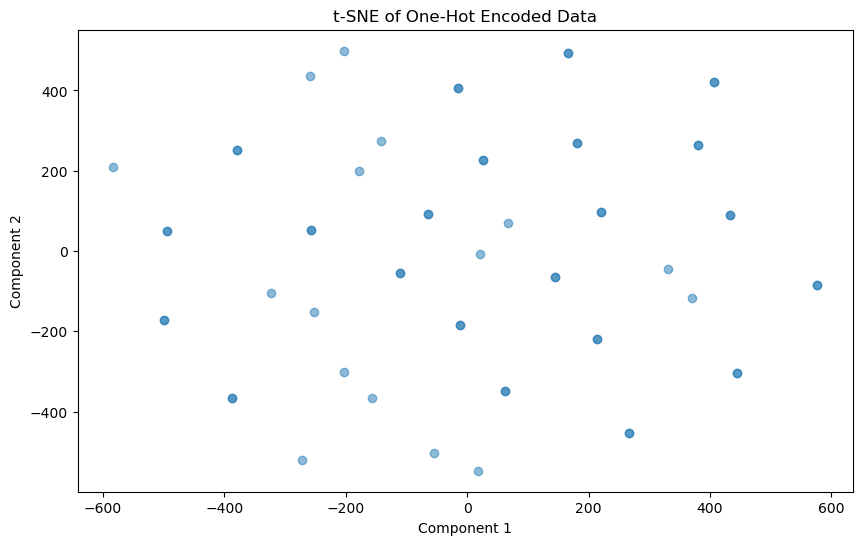

In [34]:
one_hot_array = one_hot_encoded_ingredients.to_numpy()
plot_tsne(one_hot_array, 't-SNE of One-Hot Encoded Data')

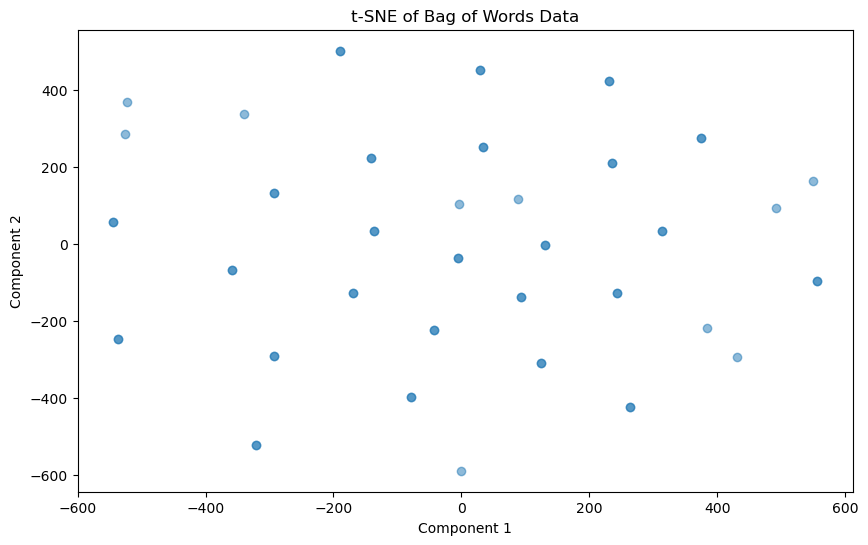

In [35]:
bow_array = df_bow_sklearn.to_numpy()
plot_tsne(bow_array, 't-SNE of Bag of Words Data')

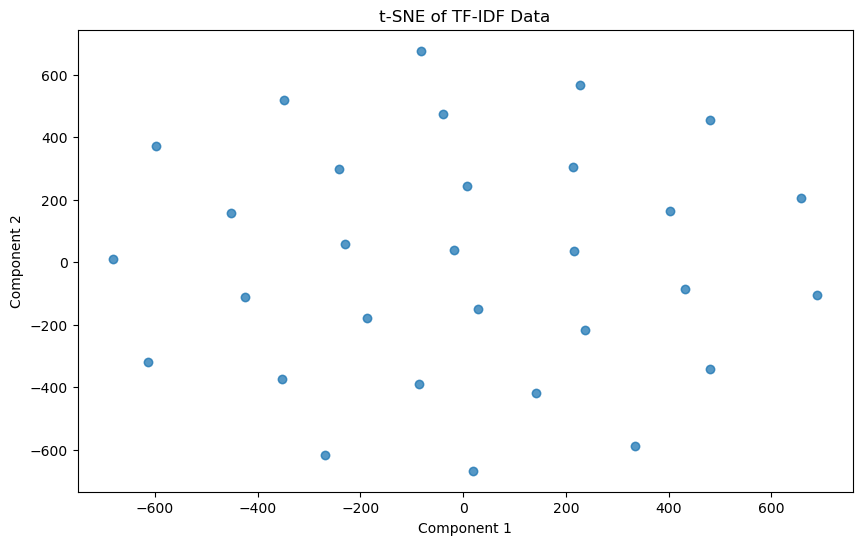

In [36]:
tfidf_array = result.toarray()
plot_tsne(tfidf_array, 't-SNE of TF-IDF Data')

<h3>Lab Learning Recap</h3>

<p>In the lab, I explored several techniques for text vectorization and embedding. 
<li>Vectorization methods like One Hot Encoding, Bag of Words, and TF-IDF helped in representing text, with TF-IDF particularly effective in highlighting key words and filtering out noise. 
<li>Neural embedding techniques such as Word2Vec, GloVe, and FastText allowed for embedding words in a vector space that captures semantic relationships, with FastText notably improving handling of out-of-vocabulary words through subword information. 
<li>Additionally, the lab incorporated the use of t-SNE, a technique for reducing dimensionality and visually validating the quality of embeddings by illustrating how words cluster and separate in a two-dimensional space.
</p>